In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read file
df  = pd.read_csv('SmartCrop-Dataset.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
df.shape

(2200, 8)

In [7]:
df.size

17600

In [8]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df.count()

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [10]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df.label.nunique()  # len(df.label.unique())

22

In [12]:
df.label.value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation between different features')

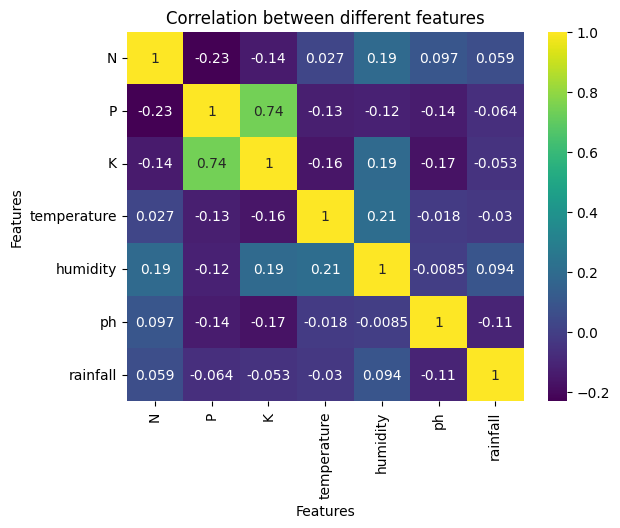

In [13]:
# Correlation between different features
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap='viridis')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation between different features')

In [84]:
df.pivot_table(df, index = 'label', aggfunc='mean')

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [15]:
# Features selection
feature = df.drop('label', axis = 1)
target = df.label

In [16]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state= 2)

In [35]:
X_test.shape

(440, 7)

In [50]:
array  = X_test.iloc[0:1].to_numpy()
array

array([[ 83.        ,  21.        ,  28.        ,  25.5674832 ,
         60.49244602,   7.46690068, 190.2257843 ]])

In [17]:
# all model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

In [18]:
# different models
model_perams = {
    'LogisticRegression':{
        'model': LogisticRegression(),
        'perams':{
            'C' : [1,5,10]
        }
    },
    'DecisionTreeClassifier':{
        'model': DecisionTreeClassifier(),
        'perams':{
            'max_depth': [5, 10, 20],
            'criterion': ['gini', 'entropy']
        }      
    },
    'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'perams':{
            'n_neighbors': [3, 5, 7, 10, 15],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }     
    },
    'SVC':{
        'model':SVC(),
        'perams':{
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf']
        }      
    },
}

In [19]:
score = []
acc = []
model_acc = []

for key, model in model_perams.items():
    print("start for", key)
    gsc = GridSearchCV(model['model'], model['perams'],n_jobs = -1, cv=5, scoring = 'accuracy')
    gsc.fit(X_train, y_train)
    score.append({
        'model' : key,
        'best_perams':gsc.best_params_ ,
        'best_score' :gsc.best_score_,
    })
    # model = gsc.best_estimator_
    # model.fit(X_train, y_train)
    y_predict = gsc.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_predict))
    model_acc.append(key)

start for LogisticRegression
start for DecisionTreeClassifier
start for KNeighborsClassifier
start for SVC


In [20]:
# GridSearchCV
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)
y_predict = modelNB.predict(X_test)
acc.append(metrics.accuracy_score(y_test, y_predict))
model_acc.append('GaussianNB')

In [21]:
# ensemble model
model_perams = {
    'AdaBoostClassifier':{
        'model': AdaBoostClassifier(),
        'perams':{
            'n_estimators' : [1,10,50,100],
            'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1],
            'algorithm' :['SAMME', 'SAMME.R']
        }
    },
    'BaggingClassifier':{
        'model': BaggingClassifier(),
        'perams':{
            'n_estimators' : [1,50,100],
            'max_features' :[0.1,0.7,1.0],
        }
    },
    'ExtraTreesClassifier':{
        'model': ExtraTreesClassifier(),
        'perams':{
            'n_estimators' : [1,50,100],
            'max_depth': [10, 20, 30],
        }
    },
    'RF':{
        'model': RandomForestClassifier(),
        'perams':{
            'n_estimators' : [20,50,100],
        }
    }
}

In [22]:
for key, model in model_perams.items():
    print("start for", key)
    gsc = GridSearchCV(model['model'], model['perams'],n_jobs = -1, cv=5, scoring = 'accuracy')
    gsc.fit(X_train, y_train)
    score.append({
        'model' : key,
        'best_perams':gsc.best_params_ ,
        'best_score' :gsc.best_score_,
    })
    y_predict = gsc.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_predict))
    model_acc.append(key)

start for AdaBoostClassifier
start for BaggingClassifier
start for ExtraTreesClassifier
start for RF


In [23]:
model_acc

['LogisticRegression',
 'DecisionTreeClassifier',
 'KNeighborsClassifier',
 'SVC',
 'GaussianNB',
 'AdaBoostClassifier',
 'BaggingClassifier',
 'ExtraTreesClassifier',
 'RF']

In [24]:
acc

[0.9522727272727273,
 0.9840909090909091,
 0.9681818181818181,
 0.9772727272727273,
 0.990909090909091,
 0.875,
 0.990909090909091,
 0.990909090909091,
 0.9931818181818182]

<Axes: >

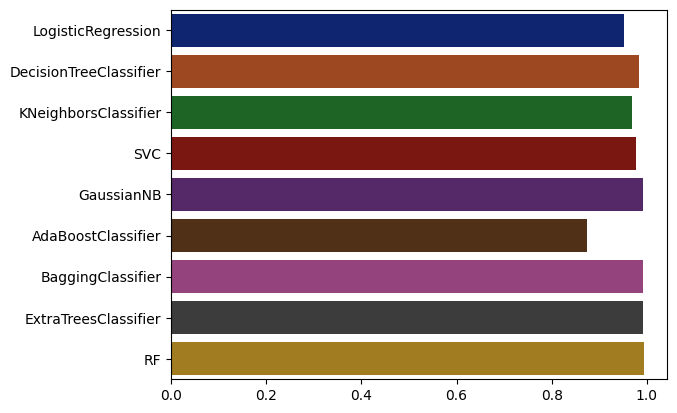

In [25]:
sns.barplot(x = acc,y = model_acc,palette='dark')

In [26]:
best_model = pd.DataFrame(score)
best_model

,model,best_perams,best_score
0,LogisticRegression,{'C': 1},0.957386
1,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 10}",0.984659
2,KNeighborsClassifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",0.985227
3,SVC,"{'C': 10, 'kernel': 'linear'}",0.989773
4,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'learning_rate': 0.1,...",0.901136
5,BaggingClassifier,"{'max_features': 0.7, 'n_estimators': 100}",0.993182
6,ExtraTreesClassifier,"{'max_depth': 20, 'n_estimators': 50}",0.993182
7,RF,{'n_estimators': 100},0.996023


In [27]:
pd.DataFrame({
    'model': model_acc,
    'acc':acc
})

,model,acc
0,LogisticRegression,0.952273
1,DecisionTreeClassifier,0.984091
2,KNeighborsClassifier,0.968182
3,SVC,0.977273
4,GaussianNB,0.990909
5,AdaBoostClassifier,0.875000
6,BaggingClassifier,0.990909
7,ExtraTreesClassifier,0.990909
8,RF,0.993182


In [28]:
# finding the best model
best_model[best_model.best_score == max(best_model.best_score)]

,model,best_perams,best_score
7,RF,{'n_estimators': 100},0.996023


In [29]:
# buliding the model
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [30]:
model.score(X_test, y_test)

0.990909090909091

In [31]:
y_predict = model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

<Axes: >

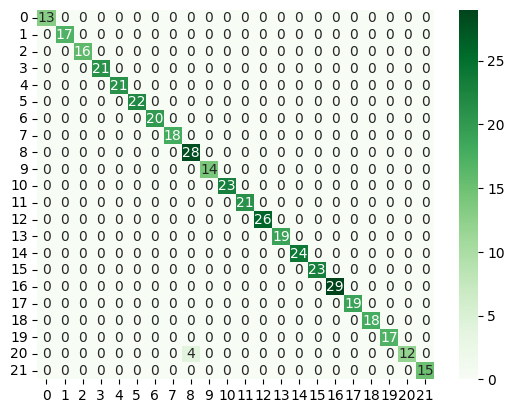

In [33]:
sns.heatmap(cm, annot = True, cmap='Greens')

In [34]:
# save model
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']

In [79]:
# predciton
model.predict([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]).item()

'coffee'

In [80]:
model.predict([[83, 45, 60, 28, 70.3, 7.0, 150.9]])

array(['jute'], dtype=object)

In [83]:
model.predict([[25, 45, 40, 28, 70.3, 7.0, 150.9]])

array(['mango'], dtype=object)